In [1]:
import pandas as pd

# Load the dataset
file_path = 'MY.DENGUE.csv'
dengue_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
dengue_data.head()


,ConditionName,ConditionSNOMED,PathogenName,PathogenTaxonID,Fatalities,CountryName,CountryISO,Admin1Name,Weeks,PeriodStartDate,PeriodEndDate,CountValue
0,Dengue,38362002,Dengue virus,12637,0,MALAYSIA,MY,JOHOR,1,1/1/2010,7/1/2010,2
1,Dengue,38362002,Dengue virus,12637,0,MALAYSIA,MY,JOHOR,2,8/1/2010,14/1/2010,5
2,Dengue,38362002,Dengue virus,12637,0,MALAYSIA,MY,JOHOR,3,15/1/2010,21/1/2010,4
3,Dengue,38362002,Dengue virus,12637,0,MALAYSIA,MY,JOHOR,4,22/1/2010,28/1/2010,6
4,Dengue,38362002,Dengue virus,12637,0,MALAYSIA,MY,JOHOR,5,29/1/2010,4/2/2010,7


In [2]:
# Check for missing values in the dataset
missing_values = dengue_data.isnull().sum()

# Feature Engineering: Convert dates to a usable format
# Convert 'PeriodStartDate' to a datetime object and extract the year and month

dengue_data['PeriodStartDate'] = pd.to_datetime(dengue_data['PeriodStartDate'], format='%d/%m/%Y')
dengue_data['Year'] = dengue_data['PeriodStartDate'].dt.year
dengue_data['Month'] = dengue_data['PeriodStartDate'].dt.month

# Drop columns that may not be relevant or are redundant
# 'ConditionName', 'ConditionSNOMED', 'PathogenName', 'PathogenTaxonID', 'CountryName', 'CountryISO', 'PeriodEndDate'

dengue_data_cleaned = dengue_data.drop(['ConditionName', 'ConditionSNOMED', 'PathogenName', 'PathogenTaxonID', 
                                        'CountryName', 'CountryISO', 'PeriodEndDate'], axis=1)

# Display the missing values and the first few rows of the updated dataset
missing_values, dengue_data_cleaned.head()


(ConditionName      0
 ConditionSNOMED    0
 PathogenName       0
 PathogenTaxonID    0
 Fatalities         0
 CountryName        0
 CountryISO         0
 Admin1Name         0
 Weeks              0
 PeriodStartDate    0
 PeriodEndDate      0
 CountValue         0
 dtype: int64,
    Fatalities Admin1Name  Weeks PeriodStartDate  CountValue  Year  Month
 0           0      JOHOR      1      2010-01-01           2  2010      1
 1           0      JOHOR      2      2010-01-08           5  2010      1
 2           0      JOHOR      3      2010-01-15           4  2010      1
 3           0      JOHOR      4      2010-01-22           6  2010      1
 4           0      JOHOR      5      2010-01-29           7  2010      1)

In [3]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import joblib

# One-Hot Encoding for 'Admin1Name'
one_hot_encoder = OneHotEncoder(sparse=False)
admin1_encoded = one_hot_encoder.fit_transform(dengue_data_cleaned[['Admin1Name']])
admin1_encoded_df = pd.DataFrame(admin1_encoded, columns=one_hot_encoder.get_feature_names_out(['Admin1Name']))

# Save the fitted OneHotEncoder
joblib.dump(one_hot_encoder, 'one_hot_encoder.joblib')

# Normalization for numerical features
scaler = MinMaxScaler()
numerical_features = ['Weeks', 'Year', 'Month', 'Fatalities']
dengue_data_cleaned[numerical_features] = scaler.fit_transform(dengue_data_cleaned[numerical_features])

# Save the fitted MinMaxScaler
joblib.dump(scaler, 'scaler.joblib')

# Combine the one-hot encoded and normalized features
processed_data = pd.concat([dengue_data_cleaned.drop(['Admin1Name'], axis=1), admin1_encoded_df], axis=1)

# Display the first few rows of the processed dataset
processed_data.head()


c:\Users\siran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Fatalities,Weeks,PeriodStartDate,CountValue,Year,Month,Admin1Name_JOHOR,Admin1Name_KEDAH,Admin1Name_KELANTAN,Admin1Name_MELAKA,...,Admin1Name_PAHANG,Admin1Name_PERAK,Admin1Name_PERLIS,Admin1Name_PULAU PINANG,Admin1Name_SABAH,Admin1Name_SARAWAK,Admin1Name_SELANGOR,Admin1Name_TERENGGANU,Admin1Name_WP KUALA LUMPUR,Admin1Name_WP LABUAN
0,0.0,0.000000,2010-01-01,2,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.019608,2010-01-08,5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.039216,2010-01-15,4,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.058824,2010-01-22,6,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.078431,2010-01-29,7,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = processed_data.drop(['CountValue', 'PeriodStartDate'], axis=1)  # Dropping 'PeriodStartDate' as we have extracted Year and Month
y = processed_data['CountValue']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((7488, 19), (1872, 19), (7488,), (1872,))

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Another hidden layer
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Model Loss on Test Data: {loss}')

# Saving the model
model.save('my_model.h5')




Epoch 1/100

234/234 [==============================] - 2s 2ms/step - loss: 9.9553
Epoch 2/100
234/234 [==============================] - 0s 2ms/step - loss: 6.4179
Epoch 3/100
234/234 [==============================] - 0s 2ms/step - loss: 5.5776
Epoch 4/100
234/234 [==============================] - 0s 2ms/step - loss: 4.7750
Epoch 5/100
234/234 [==============================] - 0s 2ms/step - loss: 4.1825
Epoch 6/100
234/234 [==============================] - 0s 2ms/step - loss: 3.7210
Epoch 7/100
234/234 [==============================] - 0s 2ms/step - loss: 3.4201
Epoch 8/100
234/234 [==============================] - 0s 2ms/step - loss: 3.3633
Epoch 9/100
234/234 [==============================] - 0s 2ms/step - loss: 3.0505
Epoch 10/100
234/234 [==============================] - 0s 2ms/step - loss: 2.9945
Epoch 11/100
234/234 [==============================] - 0s 2ms/step - loss: 2.7749
Epoch 12/100
234/234 [==============================] - 0s 2ms/step - loss: 2.7255
Epoch 13/

C:\Users\siran\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


59/59 [==============================] - 0s 3ms/step
MAE: 0.7049787560692773
MSE: 2.27260273977081
RMSE: 1.5075154194139475
R-squared (R²): 0.8457585851518237


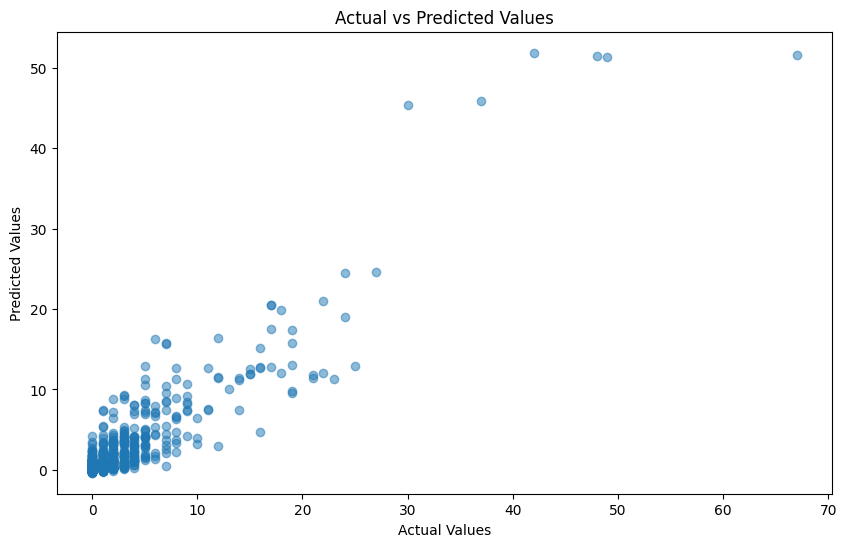

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

# Scatter plot of actual vs predicted values
import matplotlib.pyplot as plt


# Scatter plot of actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()